In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from ipywidgets import interact

Write code to read the entire novel, remove all punctuation, and replace multiple whites-
paces with a single space. Then count the number of times each word (case insensitive)
occurs in the text. Show a histogram of the top 15 words in the text. Hint: you can
use a collections.Counter or use pd.Series to get the sorted values.

Top 15 words [('the', 1613), ('and', 781), ('to', 707), ('a', 620), ('she', 521), ('of', 503), ('said', 421), ('it', 381), ('in', 353), ('was', 333), ('i', 321), ('you', 287), ('as', 252), ('that', 230), ('alice', 222)]
Longest word : the


<BarContainer object of 15 artists>

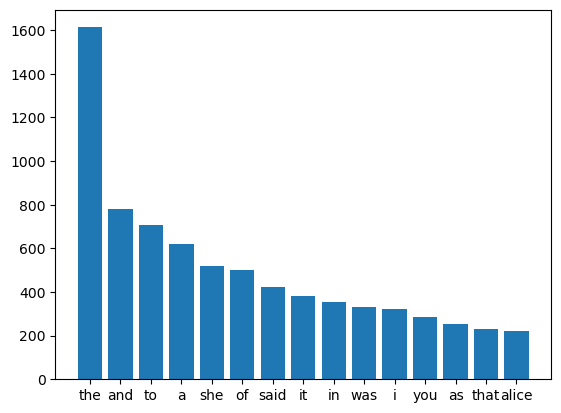

In [4]:
punctuation = ".,;:!?\"'()[]{}-"
map ={}
with open("../data/alice.txt") as f:
     data = f.readlines()
     #print(data)
     for line in data:
         line=line.strip(punctuation)
         #print(line)
         for word in line.split():
             word = ' '.join(word.split()) 
            # print(word)
             word = word.lower()
             if word in map:
                map[word] += 1
             else:
                map[word] = 1
     
sorted_map = dict(sorted(map.items(), key=lambda item: item[1], reverse=True))

sorted_items = list(sorted_map.items())
print("Top 15 words" , sorted_items[:15])
print("Longest word :" , (sorted_items[0][0]))
top_words= dict(list(sorted_map.items())[:15])
plt.bar(top_words.keys(), top_words.values())



             

In [ ]:
# #Now split the book into the respective chapters. You will need to see the text file and
# think about how to do this. Once you have the text of each of the chapters, we will
# track the occurrence of 3 characters in the book namely, “Alice”, “White Rabbit”, and
# the “Hatter”. Find out in which chapters these characters occur, i.e. for each character
# list the chapters that they occur in and also count the number of times they occur in
# each chapter. Rank the characters on the number of times they occur in total in the
# book. Plot these quantities suitably. (5 marks)
from collections import defaultdict
map =defaultdict(list)
with open("../data/alice.txt") as f:
     data = f.readlines()
     #print(data)
     counter =0 
     for line in data:
         line=line.strip(punctuation).strip(string.whitespace)
         #print(line)
         
         if 'Chapter' in line:
             counter=counter+1
             map[counter]=[]
             #skip line with chapter text and append words to that chapter
         else:
             map[counter].append(line.strip(punctuation))   
            
    
characters=["Alice", "White Rabbit","Hatter"]
chapterListByChar=defaultdict(list)
wordCountOfCharacterByChapter={}

for character in characters:
    for chapter in map:
        values=map[chapter]
       # print(type(values))
        str=" ".join(values)
        #print(str)
        #words=values.split()  
        if character in str:
            chapterListByChar[character].append(chapter)
            
#for each character list the chapters that they occur in     
for character in chapterListByChar:
    print("Character ", character, "and chapter list : ",chapterListByChar[character] )
    

#Rank the characters on the number of times they occur in total in the
for character in characters:
    wordCountOfCharacterByChapter[character]=defaultdict(int)
    for chapter in map:
        values=map[chapter]
       # print(type(values))
        str=" ".join(values)
        count = str.count(character)
        if count > 0:
            wordCountOfCharacterByChapter[character][chapter]=count
print("Character count by chapter ", wordCountOfCharacterByChapter)


Character  Alice and chapter list :  [0]
Character  White Rabbit and chapter list :  [0]
Character  Hatter and chapter list :  [0]
Character count by chapter  {'Alice': defaultdict(<class 'int'>, {0: 395}), 'White Rabbit': defaultdict(<class 'int'>, {0: 22}), 'Hatter': defaultdict(<class 'int'>, {0: 55})}


: 

In [73]:
# Write a generic function called get_batting_data(file_name) which reads the clip-
# board and saves the data out to a CSV file using the code we have shared in the class.
# Use this function to save the data as a CSV file for any other Indian batsman of your
# choice

#


def get_batting_data(file_name):
    clipboard = pd.read_clipboard()
    clipboard.to_csv(file_name, index=False)
    
get_batting_data("../midterm_pravin_clip_data.csv")


In [120]:
df_kohli=pd.read_csv("../data/kohli_batting.csv")
df_rohit=pd.read_csv("../data/rohit_batting.csv")
batsman_map = {"kohli":df_kohli, "rohit": df_rohit}


                Runs  Inns          SR
Opposition                            
Afghanistan    122.0     3  102.275000
Australia     2451.0    49   83.484792
Bangladesh     932.0    17   84.060588
England       1397.0    38   75.865789
Ireland         78.0     2   84.455000
Nepal            0.0     1         NaN
Netherlands     63.0     2   75.535000
New Zealand   1657.0    33   80.311818
Pakistan       778.0    17   75.205882
South Africa  1504.0    30   73.404138
Sri Lanka     2652.0    55   81.732593
U.A.E.          33.0     1   80.480000
West Indies   2261.0    42   86.386585
Zimbabwe       253.0     8   80.548000
                Runs  Inns          SR
Opposition                            
Afghanistan    150.0     3   80.316667
Australia     2407.0    46   81.702174
Bangladesh     827.0    18   81.950556
England        846.0    23   71.466957
Hong Kong       34.0     2   71.235000
Ireland         64.0     2   96.960000
Nepal           74.0     1  125.420000
Netherlands     61.0     

C:\Users\pravi\AppData\Local\Temp\ipykernel_676\1373205256.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\pravi\AppData\Local\Temp\ipykernel_676\1373205256.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(result_kohli.index, rotation=45)
C:\Users\pravi\AppData\Local\Temp\ipykernel_676\1373205256.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(result_rohit.index, rotation=45)


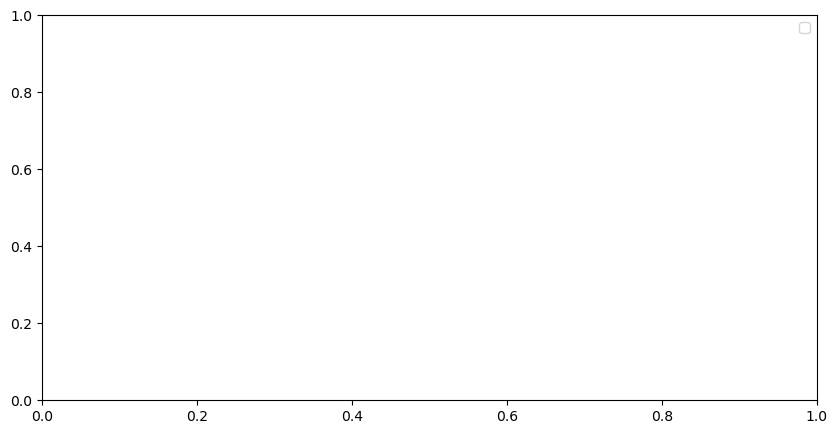

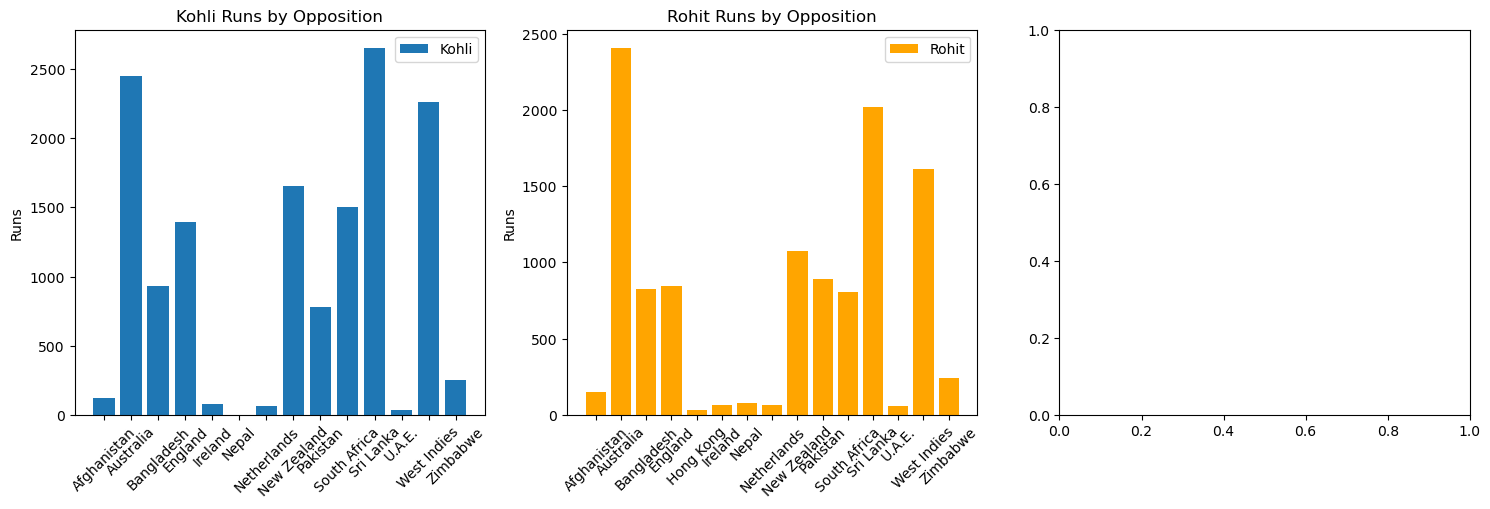

In [176]:
# Now given these three batsmen, compare their relative performance against the the top
# cricketing teams, i.e. India, Sri Lanka, Australia, England, South Africa, West Indies,
# and Pakistan (ignore the other countries). Specifically look at the number of innings
# they have played against each country, how many runs they have scored, the distribution
# of the runs, and at what average strike rate. For each of these, plot the data using an
# appropriate method. Provide a compact representation of the plots and not make too
# many plots (for example, use subplots or show multiple players together). Make some
# comments on each player’s performance

#df_kohli=pd.read_csv("../data/kohli_batting.csv")
len(df_kohli)

# countries=["India","Sri Lanka", "Australia" , "England", "South Africa"]
# #'Age > @age_threshold and Salary < @salary_limit'

# map={}

result_kohli=df_kohli.groupby("Opposition").agg({'Runs':'sum',"Inns":"count", "SR":"mean"})
print(result_kohli)


result_rohit=df_rohit.groupby("Opposition").agg({'Runs':'sum',"Inns":"count", "SR":"mean"})
print(result_rohit)


#plot distribution of runs
plt.figure(figsize=(10,5))   ;   
# plt.hist(df_kohli['Runs'], bins=30, alpha=0.5, label='Kohli');
# plt.hist(df_rohit['Runs'], bins=30, alpha=0.5, label='Rohit');
plt.legend()

#Provide a compact representation of the plots and not make too
# many plots (for example, use subplots or show multiple players together). Make some
# comments on each player’s performance

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].bar(result_kohli.index, result_kohli['Runs'], label='Kohli')
axs[0].set_title('Kohli Runs by Opposition')
axs[0].set_ylabel('Runs')
axs[0].set_xticklabels(result_kohli.index, rotation=45)
axs[0].legend()     

axs[1].bar(result_rohit.index, result_rohit['Runs'], color='orange', label='Rohit')
axs[1].set_title('Rohit Runs by Opposition')            
axs[1].set_ylabel('Runs')
axs[1].set_xticklabels(result_rohit.index, rotation=45) 
axs[1].legend()




In [161]:
# Write an interactive plotting function that is given a specific country (as a string), an
# option, which is one of “runs”, or “SR” and one option which is either “box” or “violin”.
# The function should compare the three batsmen as per the option provided


@interact(country=["Australia","Sri Lanka"],batsman=[ i for i in batsman_map], option=["Runs","SR"],plotType=["Boxplot","violin"], bins=['auto','fd','doane','scott','stone','rice','sturges','sqrt',5,10,15,20,25,30])
def showPlot(country, batsman,option , plotType,bins):
        print("Incoming batsman , option , plot ", batsman,option,plotType)
        df_batsapn=batsman_map[batsman]
        #df_kohli=pd.read_csv("../data/kohli_batting.csv")
        result=df_batsapn["Opposition"]==country
        result=df_batsapn[result]
        if plotType=="violin":
            result.boxplot(column=option , by="Opposition")
            plt.title(batsman + " " + option + " " + plotType)
            plt.violinplot(result[option])
            #plt.ylabel(option)
            #plt.show()
        if plotType=="Boxplot":    
            result.boxplot(column=option , by="Opposition")
            plt.title(batsman + " " + option + " " + plotType)
            plt.ylabel(option)
            plt.show()

    
    

interactive(children=(Dropdown(description='country', options=('Australia', 'Sri Lanka'), value='Australia'), …